# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Jupito Salim
- **Email:** Junpitosalim@gmail.com
- **ID Dicoding:** 490585

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda?
- Bagaimana Perbedaan Jumlah Penyewaan Sepeda Berdasarkan Musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

Kami akan menggunakan dataset penyewaan sepeda per jam (hour.csv) yang berisi informasi terkait berbagai faktor cuaca, waktu, serta jumlah pengguna yang menyewa sepeda baik casual maupun terdaftar.

In [2]:
df = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dari hasil output di atas, kita dapat melihat beberapa kolom penting dalam dataset, seperti:
- `instant`: Nomor urut baris.
- `dteday`: Tanggal data diambil.
- `season`: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- `yr`: Tahun, 0 untuk 2011 dan 1 untuk 2012.
- `mnth`: Bulan dari 1 hingga 12.
- `hr`: Jam dalam format 24 jam.
- `holiday`: 1 jika hari tersebut libur, 0 jika bukan libur.
- `weekday`: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- `workingday`: 1 jika hari kerja (bukan libur), 0 jika tidak.
- `weathersit`: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- `temp`: Suhu aktual dalam skala 0 hingga 1.
- `atemp`: Suhu "feels like" atau suhu yang dirasakan.
- `hum`: Kelembapan dalam skala 0 hingga 1.
- `windspeed`: Kecepatan angin dalam skala 0 hingga 1.
- `casual`: Jumlah pengguna casual (tanpa registrasi).
- `registered`: Jumlah pengguna terdaftar.
- `cnt`: Jumlah total penyewaan sepeda.

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


** Insight: **
- Dataset berisi **17,379 baris** dan **17 kolom**.
- Dataset tidak memiliki nilai yang hilang (null) karena jumlah data non-null untuk setiap kolom sama dengan jumlah baris total.
- Ada berbagai tipe data dalam dataset:
  - **Kolom numerik**: Kolom seperti `season`, `yr`, `mnth`, `hr`, dan lainnya adalah tipe data integer.
  - **Kolom float**: Kolom seperti `temp`, `atemp`, `hum`, dan `windspeed` menggunakan tipe float64.
  - **Kolom objek**: Kolom `dteday` adalah tipe object (string). note: kolom kemungkinan Inaccurate value
- Ukuran memori yang digunakan oleh dataset adalah **2.3+ MB**.

In [4]:
# Mengecek apakah ada duplikasi di dataset
df.duplicated().sum()

0

**Insight:**
- tidak ada duplikasi pada dataset

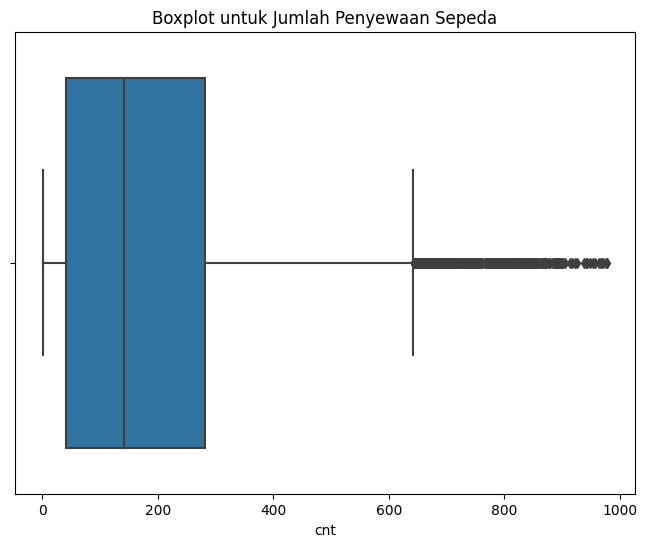

In [5]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- terdapar beberapa titik point yang merupakan outlier


In [6]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores = np.abs(stats.zscore(df['cnt']))

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

# Menampilkan baris yang merupakan outlier
df.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


**Insight:**
- terdapat **244** baris outlier dengan z-skor lebih dari 3

### Cleaning Data

In [7]:
# Mendapatkan index baris yang bukan outlier
non_outliers = np.where(z_scores <= threshold)


# Membuat DataFrame baru tanpa outlier
df_cleaned = df.iloc[non_outliers]
df_cleaned.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Mengubah kolom 'dteday' dari string ke datetime
df_cleaned.loc[:, 'dteday'] = pd.to_datetime(df_cleaned['dteday'])

## Exploratory Data Analysis (EDA)

In [9]:
df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
std,5011.06776,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000


**Insight:**

- Kolom `dteday` telah berhasil diubah menjadi tipe data `datetime`, dan data tersebar antara **1 Januari 2011** hingga **31 Desember 2012**.
- Rata-rata jumlah sepeda yang disewa (`cnt`) adalah sekitar **180 sepeda per jam**, dengan nilai minimum **1** dan maksimum **733** sepeda.
- Kolom `temp` (temperatur berskala 0 hingga 1) memiliki nilai rata-rata **0.49**, sedangkan kolom `hum` (kelembaban) memiliki rata-rata **0.63**.
- Jumlah pengguna terdaftar (`registered`) lebih tinggi dibandingkan pengguna tidak terdaftar (`casual`), dengan rata-rata **145 pengguna terdaftar** dan **34 pengguna tidak terdaftar** per jam.
- Distribusi data untuk variabel lain:
  - **Season**: Nilai rata-rata **2.49**, menunjukkan bahwa sebagian besar data berasal dari musim kedua hingga ketiga (Spring hingga Summer).
  - **Weathersit**: Nilai rata-rata **1.42**, yang berarti cuaca umumnya adalah kondisi **baik atau cukup baik**.
  - **Windspeed**: Rata-rata nilai kecepatan angin adalah **0.19**, dengan nilai tertinggi **0.85**.
- Dataset ini mencakup semua informasi cuaca, waktu, dan kondisi operasional yang relevan dengan analisis jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

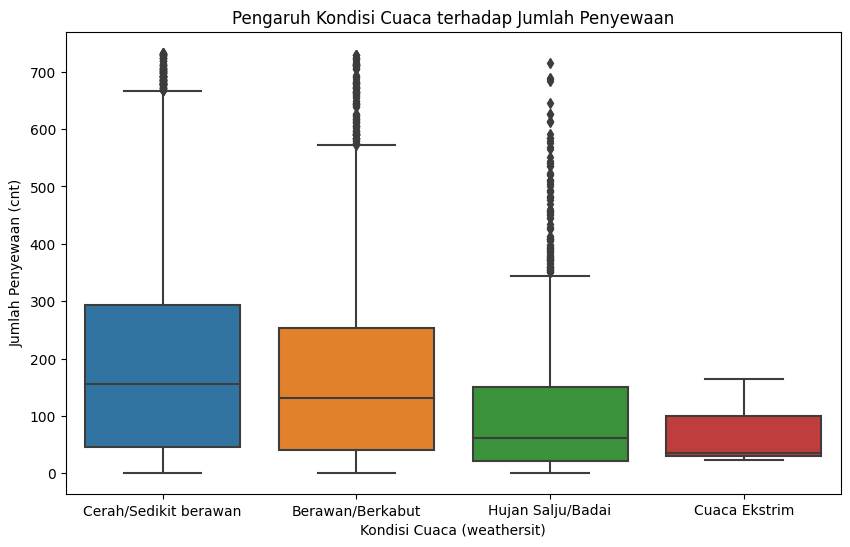

In [10]:
# Membuat plot boxplot untuk melihat distribusi jumlah penyewaan dalam berbagai kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_cleaned)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.xticks([0, 1, 2, 3], ['Cerah/Sedikit berawan', 'Berawan/Berkabut', 'Hujan Salju/Badai', 'Cuaca Ekstrim'])
plt.show()

In [11]:
# Menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca
avg_cnt_weather = df_cleaned.groupby('weathersit')['cnt'].mean()

# Menampilkan rata-rata jumlah penyewaan untuk setiap kondisi cuaca
print(avg_cnt_weather)

weathersit
1    193.965671
2    169.705660
3    108.097025
4     74.333333
Name: cnt, dtype: float64


**Insight:**
- **Cerah/Sedikit Berawan** (`weathersit = 1`) memiliki rata-rata penyewaan tertinggi yaitu sekitar **194** penyewaan.
- **Berawan/Berkabut** (`weathersit = 2`) sedikit lebih rendah, dengan rata-rata sekitar **170** penyewaan.
- **Hujan Salju/Badai** (`weathersit = 3`) secara signifikan lebih rendah dengan rata-rata hanya **108** penyewaan.
- **Cuaca Ekstrim** (`weathersit = 4`) memiliki jumlah penyewaan terendah, dengan **74** penyewaan rata-rata.



### Pertanyaan 2:

In [12]:
df['season'].unique()

array([1, 2, 3, 4])

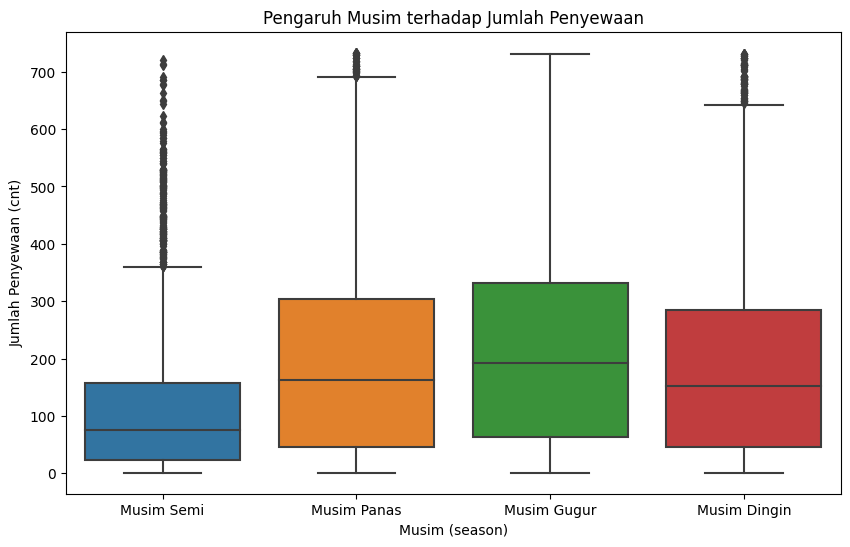

In [13]:
# Membuat boxplot untuk distribusi penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_cleaned)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan')
plt.xlabel('Musim (season)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

In [14]:
# Menghitung rata-rata jumlah penyewaan berdasarkan musim
avg_cnt_season = df_cleaned.groupby('season')['cnt'].mean()

# Menampilkan rata-rata jumlah penyewaan untuk setiap musim
print(avg_cnt_season)

season
1    110.031877
2    200.970608
3    220.136135
4    189.041757
Name: cnt, dtype: float64


**Insight:**
- **Musim Gugur** (`season = 3`) memiliki rata-rata penyewaan tertinggi yaitu sekitar **220** penyewaan.
- **Musim Panas** (`season = 2`) sedikit lebih rendah, dengan rata-rata sekitar **201** penyewaan.
- **Musim Dingin** (`season = 4`) secara signifikan lebih rendah dengan rata-rata hanya **189** penyewaan.
- **Musim Semi** (`season = 1`) memiliki jumlah penyewaan terendah, dengan **110** rata-rata penyewaan.

catatan:
setelah melihat plot tren tahunan di bawah, saya merasa jika rata-rata ini ada bias dari peningkatan tahun kedua dari tahun pertama

## Analisis Lanjutan (Opsional)

### Tren Penyewaan Tahun Pertama

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

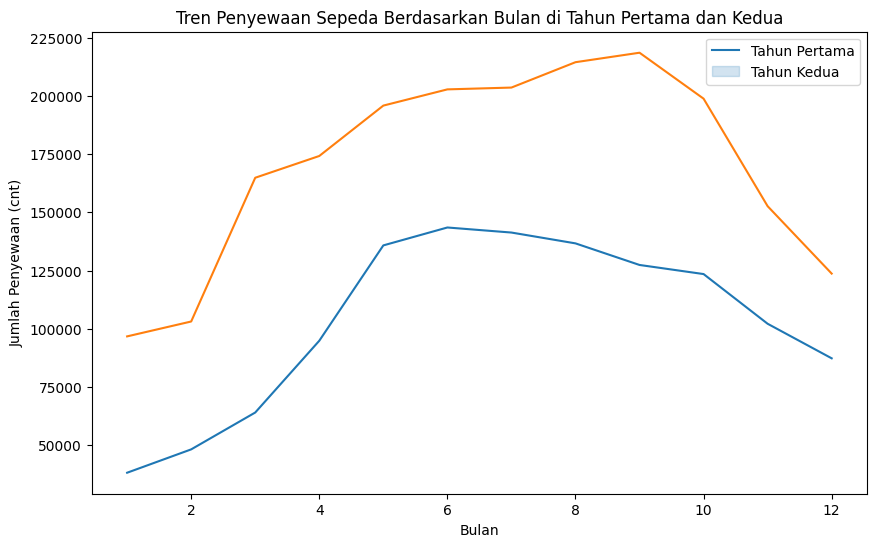

In [15]:
# Membuat data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Visualisasi dengan line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr')
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.legend(['Tahun Pertama', 'Tahun Kedua'])
plt.show()

**Insight:** 
- Jumlah penyewaan sepeda pada tahun kedua secara konsisten lebih tinggi dibandingkan dengan tahun pertama.
- Pada awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus), terjadi peningkatan yang signifikan.
- Pada akhir tahun jumlah penyewaan secara konsisten menurun.

### Pengelompokan Rentang Waktu Sewa

In [16]:
# Membuat kolom baru 'rentang_waktu' berdasarkan jam
def assign_time_of_day(hr):
    if 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 16:
        return 'Siang'
    elif 16 <= hr < 20:
        return 'Sore'
    else:
        return 'Malam'

# Asign jam ke kategori rentang waktu
df['rentang_waktu'] = df['hr'].apply(assign_time_of_day)


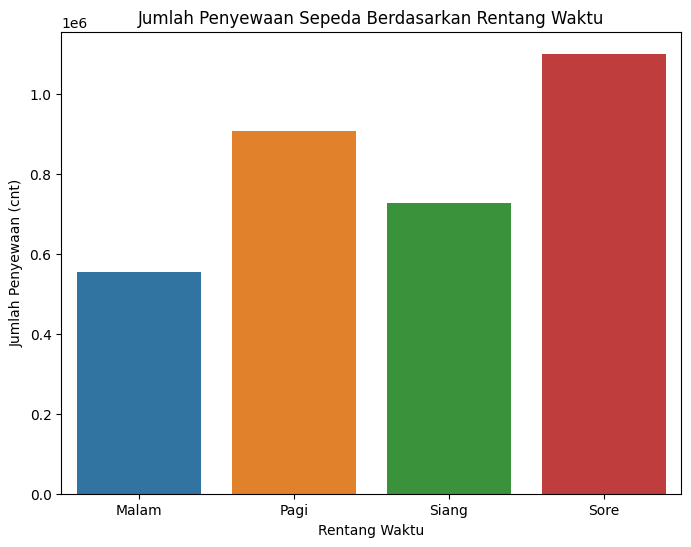

In [17]:
# Hitung jumlah penyewaan berdasarkan rentang waktu
grouped = df.groupby('rentang_waktu')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='rentang_waktu', y='cnt', data=grouped)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Rentang Waktu')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

**Insight:**

- **Sore hari** mencatat jumlah penyewaan tertinggi, mencapai lebih dari 1 juta penyewaan.
- **Pagi hari** berada di posisi kedua dengan sekitar 900 ribu penyewaan.
- **Siang hari** memiliki jumlah penyewaan yang lebih sedikit dibandingkan pagi dan sore, dengan kurang lebih 700 ribu penyewaan.
- **Malam hari** menunjukkan jumlah penyewaan terendah, dengan sekitar 600 ribu penyewaan.


## Conclusion

- Cuaca cerah atau sedikit berawan memiliki dampak positif terhadap jumlah penyewaan sepeda, sedangkan kondisi cuaca ekstrem secara signifikan mengurangi jumlah penyewaan. 
- Musim juga mempengaruhi penyewaan sepeda dimana peningkatan terjadi setelah pertengahan musim semi hingga pertengahan musim gugur dan menurun signifikan di musim dingin.